In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

from skimage.metrics import structural_similarity as ssim

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import img_to_array

from keras import layers

2023-04-25 13:40:13.179040: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lcadame/mambaforge/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-25 13:40:13.179054: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
SIZE=600
SUBSET_SIZE=200

In [3]:
train_hr=[]
path='train_hr/'
data=np.sort(os.listdir(path))
idx=np.random.choice(list(range(0,len(data))),SUBSET_SIZE,replace=False)
for img_path in tqdm(data[idx]):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    train_hr.append(img)
train_hr=np.array(train_hr)
    
train_lr=[]
path='train_lr/'
data=np.sort(os.listdir(path))
for img_path in tqdm(data[idx]):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    train_lr.append(img)
train_lr=np.array(train_lr)

test_hr=[]
path='test_hr/'
data=np.sort(os.listdir(path))
idx=np.random.choice(list(range(0,len(data))),SUBSET_SIZE*2//5,replace=False)
for img_path in tqdm(data[idx]):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    test_hr.append(img)
test_hr=np.array(test_hr)
    
test_lr=[]
path='test_lr/'
data=np.sort(os.listdir(path))
for img_path in tqdm(data[idx]):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    test_lr.append(img)
test_lr=np.array(test_lr)
    
valid_hr=[]
path='valid_hr/'
data=np.sort(os.listdir(path))
idx=np.random.choice(list(range(0,len(data))),SUBSET_SIZE//5,replace=False)
for img_path in tqdm(data[idx]):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    valid_hr.append(img)
valid_hr=np.array(valid_hr)
    
valid_lr=[]
path='valid_lr/'
data=np.sort(os.listdir(path))
for img_path in tqdm(data[idx]):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    valid_lr.append(img)
valid_lr=np.array(valid_lr)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 497.92it/s]


/tmp/ipykernel_11177/3907932796.py:11: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  print(ssim(img,target,multichannel=True))


0.7153732


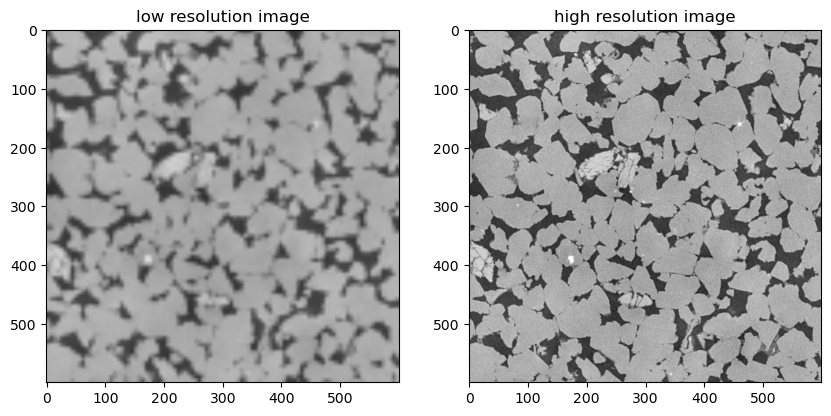

In [4]:
i=np.random.randint(0,SUBSET_SIZE)

img,target=train_lr[i],train_hr[i]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(img)
ax1.set_title('low resolution image')
ax2.imshow(target)
ax2.set_title('high resolution image')

print(ssim(img,target,multichannel=True))

In [5]:
input=Input(shape=(SIZE,SIZE,3))
x=tf.keras.layers.Conv2D(64,9,padding='same',activation='relu') (input)
x=tf.keras.layers.Conv2D(32,1,padding='same',activation='relu') (x)
output=tf.keras.layers.Conv2D(3,5,padding='same',activation='relu') (x)

model=Model(input,output)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 600, 600, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 600, 600, 64)      15616     
                                                                 
 conv2d_1 (Conv2D)           (None, 600, 600, 32)      2080      
                                                                 
 conv2d_2 (Conv2D)           (None, 600, 600, 3)       2403      
                                                                 
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________


2023-04-24 15:12:40.045529: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-24 15:12:40.045667: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lcadame/mambaforge/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-24 15:12:40.045693: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lcadame/mambaforge/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-24 15:12:40.045711: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dl

In [9]:
model.fit(train_lr,train_hr,epochs=5,batch_size=1,validation_data=(valid_lr,valid_hr))

Epoch 1/5


2023-04-24 14:13:19.029420: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 864000000 exceeds 10% of free system memory.
2023-04-24 14:13:19.243201: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 864000000 exceeds 10% of free system memory.
2023-04-24 14:13:19.636909: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1152000000 exceeds 10% of free system memory.
2023-04-24 14:13:19.636980: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1152000000 exceeds 10% of free system memory.


  1/200 [..............................] - ETA: 2:25 - loss: 0.3647

2023-04-24 14:13:20.236899: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1152000000 exceeds 10% of free system memory.


200/200 [==============================] - 119s 595ms/step - loss: 0.0123 - val_loss: 0.0055
Epoch 2/5
200/200 [==============================] - 121s 607ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 3/5
200/200 [==============================] - 121s 604ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 4/5
200/200 [==============================] - 121s 607ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 5/5
200/200 [==============================] - 122s 610ms/step - loss: 0.0049 - val_loss: 0.0045


In [10]:
model_path = 'models/2404_600x_200i.h5'
model.save(model_path)

In [5]:
model_path = 'models/2404_600x_200i.h5'
model1 = tf.keras.models.load_model(model_path)

2023-04-25 13:40:26.008374: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 13:40:26.008511: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lcadame/mambaforge/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-25 13:40:26.008535: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lcadame/mambaforge/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-25 13:40:26.008553: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dl

In [6]:
train_hr=[]
path='train_hr/'
data=np.sort(os.listdir(path))
idx=np.random.choice(list(range(0,len(data))),SUBSET_SIZE,replace=False)
for img_path in tqdm(data[idx]):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    train_hr.append(img)
train_hr=np.array(train_hr)
    
train_lr=[]
path='train_lr/'
data=np.sort(os.listdir(path))
for img_path in tqdm(data[idx]):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    img=model1.predict(img.reshape(1,SIZE,SIZE,3))[0]
    train_lr.append(img)
train_lr=np.array(train_lr)

test_hr=[]
path='test_hr/'
data=np.sort(os.listdir(path))
idx=np.random.choice(list(range(0,len(data))),SUBSET_SIZE*2//5,replace=False)
for img_path in tqdm(data[idx]):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    test_hr.append(img)
test_hr=np.array(test_hr)
    
test_lr=[]
path='test_lr/'
data=np.sort(os.listdir(path))
for img_path in tqdm(data[idx]):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    img=model1.predict(img.reshape(1,SIZE,SIZE,3))[0]
    test_lr.append(img)
test_lr=np.array(test_lr)
    
valid_hr=[]
path='valid_hr/'
data=np.sort(os.listdir(path))
idx=np.random.choice(list(range(0,len(data))),SUBSET_SIZE//5,replace=False)
for img_path in tqdm(data[idx]):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    valid_hr.append(img)
valid_hr=np.array(valid_hr)
    
valid_lr=[]
path='valid_lr/'
data=np.sort(os.listdir(path))
for img_path in tqdm(data[idx]):
    img=cv2.imread(path+img_path)
    img=cv2.resize(img,(100,100))
    img=cv2.resize(img,(SIZE,SIZE))
    img=img.astype('float32')/255
    img=model1.predict(img.reshape(1,SIZE,SIZE,3))[0]
    valid_lr.append(img)
valid_lr=np.array(valid_lr)

  0%|▌                                                                                                                        | 1/200 [00:00<00:21,  9.30it/s]2023-04-25 13:40:31.657427: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 92160000 exceeds 10% of free system memory.
2023-04-25 13:40:31.711263: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 92160000 exceeds 10% of free system memory.
  2%|█▊                                                                                                                       | 3/200 [00:00<00:13, 14.88it/s]2023-04-25 13:40:31.764147: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 92160000 exceeds 10% of free system memory.
2023-04-25 13:40:31.816275: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 92160000 exceeds 10% of free system memory.
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/tmp/ipykernel_11177/3907932796.py:11: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  print(ssim(img,target,multichannel=True))


0.7642409


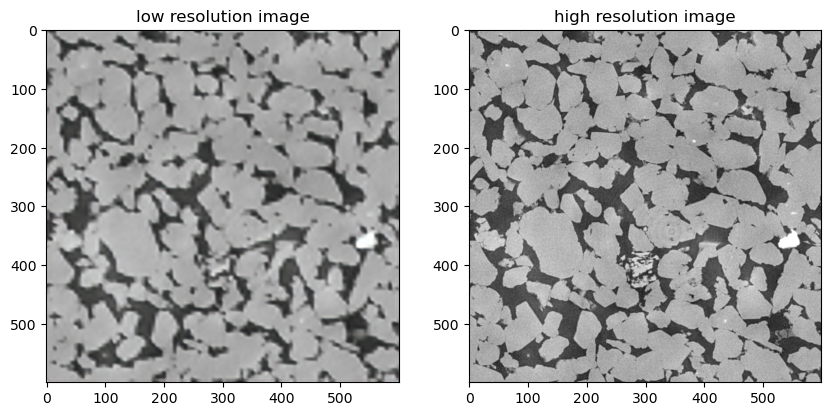

In [7]:
i=np.random.randint(0,SUBSET_SIZE)

img,target=train_lr[i],train_hr[i]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(img)
ax1.set_title('low resolution image')
ax2.imshow(target)
ax2.set_title('high resolution image')

print(ssim(img,target,multichannel=True))

In [38]:
input=Input(shape=(SIZE,SIZE,3))
x=tf.keras.layers.Conv2D(64,9,padding='same',activation='relu') (input)
x=tf.keras.layers.Conv2D(32,1,padding='same',activation='relu') (x)
output=tf.keras.layers.Conv2D(3,5,padding='same',activation='relu') (x)

model=Model(input,output)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mean_squared_error')
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 600, 600, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 600, 600, 64)      15616     
                                                                 
 conv2d_10 (Conv2D)          (None, 600, 600, 32)      2080      
                                                                 
 conv2d_11 (Conv2D)          (None, 600, 600, 3)       2403      
                                                                 
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(train_lr,train_hr,epochs=5,batch_size=1,validation_data=(valid_lr,valid_hr))

Epoch 1/5
200/200 [==============================] - 120s 599ms/step - loss: 0.0105 - val_loss: 0.0045
Epoch 2/5
200/200 [==============================] - 120s 602ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 3/5
200/200 [==============================] - 121s 604ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 4/5
200/200 [==============================] - 122s 610ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 5/5
200/200 [==============================] - 121s 607ms/step - loss: 0.0040 - val_loss: 0.0036


In [40]:
model_path = 'models/2404_600x_200i_2.h5'
model.save(model_path)

In [8]:
model_path = 'models/2404_600x_200i_2.h5'
model2 = tf.keras.models.load_model(model_path)

/tmp/ipykernel_11177/1187572573.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  print('SSIM between LR image and HR image: {}'.format(ssim(img,target,multichannel=True)))
/tmp/ipykernel_11177/1187572573.py:15: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  print('SSIM between Model Output and HR image: {}'.format(ssim(output,target,multichannel=True)))


SSIM between LR image and HR image: 0.7651975750923157
SSIM between Model Output and HR image: 0.8000480532646179


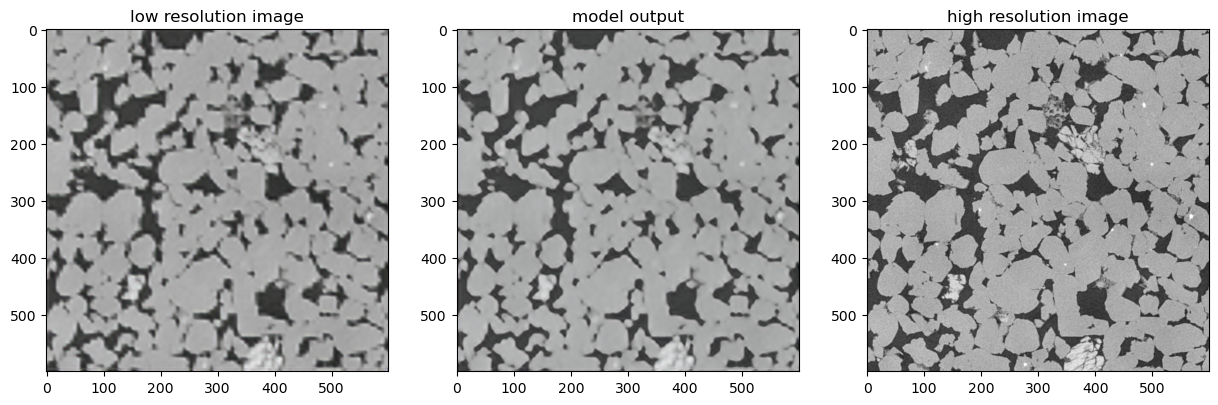

In [10]:
idx=np.random.choice(list(range(0,len(test_lr))),1)
img=test_lr[idx][0]
output=model2.predict(test_lr[idx].reshape(1,SIZE,SIZE,3))[0]
target=test_hr[idx][0]
    
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))
ax1.imshow(img)
ax1.set_title('low resolution image')
ax2.imshow(output)
ax2.set_title('model output')
ax3.imshow(target)
ax3.set_title('high resolution image')
    
print('SSIM between LR image and HR image: {}'.format(ssim(img,target,multichannel=True)))
print('SSIM between Model Output and HR image: {}'.format(ssim(output,target,multichannel=True)))  